In [10]:
# funkcija za iskanje ustreznih grafov
########################################################
# POMOŽNE FUNKCIJE
########################################################

def is_strong_odd_IS(G, S):
    """
    Preveri, ali je S strong odd independent set v G
    """
    # neodvisnost
    for u in S:
        for v in S:
            if u != v and G.has_edge(u, v):
                return False

    # liha velikost
    if len(S) % 2 == 0:
        return False

    # strong odd pogoj
    for v in G.vertices():
        if v not in S:
            cnt = sum(1 for u in S if G.has_edge(u, v))
            if cnt % 2 == 0:
                return False

    return True


def all_neighborhoods(G):
    return [set(G.neighbors(v)) for v in G.vertices()]



########################################################
# PREVERJANJE POGOJA (ii)
# N(v) is a maximum strong odd independent set for SOME vertex v
########################################################

def satisfies_ii(G):
    # 1. Splošni pogoji za graf (povezan, brez trikotnikov, liho regularen)
    if not G.is_connected():
        return False

    if G.girth() < 4:   # triangle-free
        return False

    # Preverimo regularnost in liho stopnjo na prvem vozlišču
    # (Ob predpostavki, da so grafi v seznamu regularni, sicer bi morali preveriti vsa)
    deg_seq = G.degree()
    if not deg_seq: 
        return False
    r = deg_seq[0]
    
    if r % 2 == 0:
        return False

    # 2. Iskanje VSAJ ENEGA ustreznega vozlišča v
    for v in G.vertices():
        Nv = set(G.neighbors(v))

        # a) N(v) mora biti strong odd independent set
        # (V trikotnikov prostem grafu je neodvisnost avtomatska, 
        # a funkcija is_strong_odd_IS preveri še 'strong' in 'odd' pogoje)
        if not is_strong_odd_IS(G, Nv):
            continue  # To vozlišče ne ustreza, poskusimo naslednjega

        # b) N(v) mora biti MAKSIMALNA
        # To pomeni, da ne obstaja nobeno vozlišče u (ki ni v Nv),
        # s katerim bi lahko razširili množico Nv.
        is_maximal = True
        for u in G.vertices():
            if u not in Nv:
                # Če obstaja razširitev, ki je še vedno SOIS, potem N(v) ni maksimalna
                if is_strong_odd_IS(G, Nv | {u}):
                    is_maximal = False
                    break 
        
        # Če je množica veljavna in maksimalna, smo našli ustrezno vozlišče!
        if is_maximal:
            return True

    # Če smo pregledali vsa vozlišča in nobeno ni ustrezalo
    return False


########################################################
# GLAVNI ISKALNI DEL ZA (ii)
########################################################

def search_for_ii(graph_list):
    good = []
    for G in graph_list:
        if satisfies_ii(G):
            good.append(G)
    return good

In [19]:
# r = 3
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_ii3 = {}
r = 3

for n in range(4, 21, 2):
    print(f"\nIščem grafe za (ii): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_ii(G):
            sols.append(G)

    solutions_ii3[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (ii): {len(sols)}")


Iščem grafe za (ii): n = 4
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 6
  preverjenih grafov: 1
  najdenih rešitev za (ii): 1

Iščem grafe za (ii): n = 8
  preverjenih grafov: 2
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 10
  preverjenih grafov: 6
  najdenih rešitev za (ii): 2

Iščem grafe za (ii): n = 12
  preverjenih grafov: 23
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 14
  preverjenih grafov: 112
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 16


  preverjenih grafov: 801
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 18


  preverjenih grafov: 7840
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 20


  preverjenih grafov: 97723
  najdenih rešitev za (ii): 0


Petersen graf (ii): True


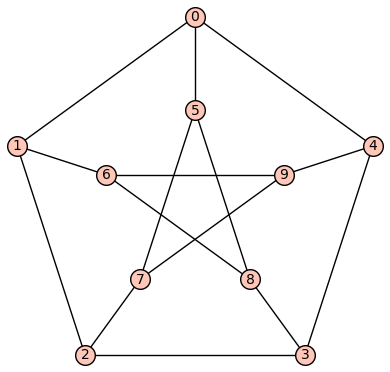

K_3,3 (ii): True


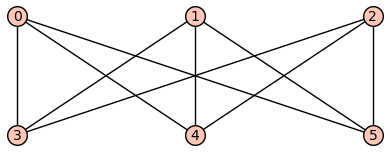

Cikel C_5 (ii, r=2): False
Prikazujem prvi najdeni graf za n=10, r=3 pod pogojem (ii):


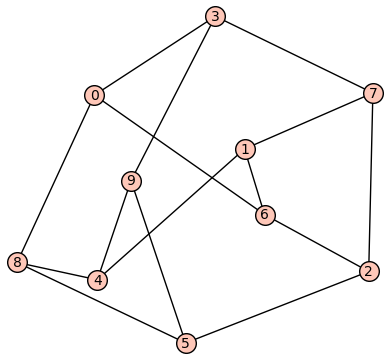

In [12]:
# 1. TEST: Petersenov graf (mora biti True, ker velja že za (i))
P = graphs.PetersenGraph()
print(f"Petersen graf (ii): {satisfies_ii(P)}")
P.show()

# 2. TEST: Poln dvodelen graf K_3,3 (mora biti True, ker velja že za (i))
K33 = graphs.CompleteBipartiteGraph(3, 3)
print(f"K_3,3 (ii): {satisfies_ii(K33)}")
K33.show()

# 3. TEST: Cikel C_5 (je 2-regularen, kar je sodo, zato mora vrniti False)
# To preveri, če vaša funkcija pravilno zavrne sode r.
C5 = graphs.CycleGraph(5)
print(f"Cikel C_5 (ii, r=2): {satisfies_ii(C5)}")

# 4. TEST: Iskanje prvega grafa, ki ustreza (ii) v vaših rezultatih
if solutions_ii3[10]:
    test_G = solutions_ii3[10][0]
    print("Prikazujem prvi najdeni graf za n=10, r=3 pod pogojem (ii):")
    test_G.show()

In [20]:
# r = 5
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_ii5 = {}
r = 5

for n in range(6, 19, 2):
    print(f"\nIščem grafe za (i): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_ii(G):
            sols.append(G)

    solutions_ii5[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (ii): {len(sols)}")


Iščem grafe za (i): n = 6
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (i): n = 8
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (i): n = 10
  preverjenih grafov: 1
  najdenih rešitev za (ii): 1

Iščem grafe za (i): n = 12
  preverjenih grafov: 1
  najdenih rešitev za (ii): 0

Iščem grafe za (i): n = 14
  preverjenih grafov: 7
  najdenih rešitev za (ii): 0

Iščem grafe za (i): n = 16


  preverjenih grafov: 388
  najdenih rešitev za (ii): 7

Iščem grafe za (i): n = 18


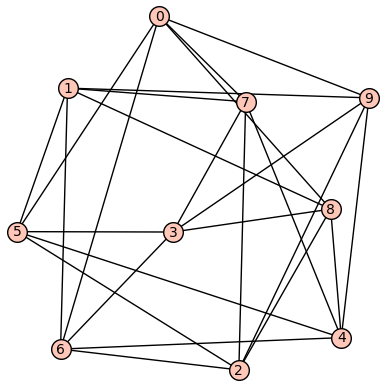

In [15]:
K_5_5 = solutions_ii5[10][0]
K_5_5.show()


In [16]:
# r = 7
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_ii7 = {}
r = 7

for n in range(8, 21, 2):
    print(f"\nIščem grafe za (ii): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_ii(G):
            sols.append(G)

    solutions_ii7[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (ii): {len(sols)}")


Iščem grafe za (ii): n = 8
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 10
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 12
  preverjenih grafov: 0
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 14
  preverjenih grafov: 1
  najdenih rešitev za (ii): 1

Iščem grafe za (ii): n = 16
  preverjenih grafov: 1
  najdenih rešitev za (ii): 0

Iščem grafe za (ii): n = 18


  preverjenih grafov: 8
  najdenih rešitev za (ii): 0


True


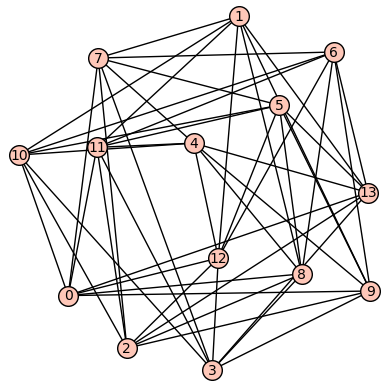

In [17]:
G_14 = solutions_ii7[14][0]
print(G_14.is_isomorphic(graphs.CompleteBipartiteGraph(7, 7)))
G_14.show()